In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split 

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
C1 = pd.read_csv('weather_end.csv',encoding='gbk')
C1

,Unnamed: 0,id,city,riqi,temperature_h,temperature_l,tem_sub,weather,w_0,w_1,...,W,N,wind_power,min_wind_power,max_wind_power,city_id,city_lng,city_lat,city_air,tem_a
0,0,1,三亚,2015/7/1,33,28,5,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,38,30.5
1,1,2,三亚,2015/7/2,34,28,6,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,40,31.0
2,2,3,三亚,2015/7/3,34,28,6,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,46,31.0
3,3,4,三亚,2015/7/4,35,28,7,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,45,31.5
4,4,5,三亚,2015/7/5,33,27,6,雷雨 多云,1,1,...,1,1,3-4级,3,4,460200,109.508,18.2479,48,30.0
5,5,6,三亚,2015/7/6,33,28,5,雷雨 多云,1,1,...,1,1,3-4级,3,4,460200,109.508,18.2479,43,30.5
6,6,7,三亚,2015/7/7,34,28,6,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,43,31.0
7,7,8,三亚,2015/7/8,32,27,5,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,58,29.5
8,8,9,三亚,2015/7/9,32,27,5,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,58,29.5
9,9,10,三亚,2015/7/10,33,26,7,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,48,29.5


In [4]:
C2 = C1['city']=='三亚'
C3 = C1
C3 = C3[C2]
C3

,Unnamed: 0,id,city,riqi,temperature_h,temperature_l,tem_sub,weather,w_0,w_1,...,W,N,wind_power,min_wind_power,max_wind_power,city_id,city_lng,city_lat,city_air,tem_a
0,0,1,三亚,2015/7/1,33,28,5,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,38,30.5
1,1,2,三亚,2015/7/2,34,28,6,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,40,31.0
2,2,3,三亚,2015/7/3,34,28,6,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,46,31.0
3,3,4,三亚,2015/7/4,35,28,7,多云,0,0,...,1,0,3-4级,3,4,460200,109.508,18.2479,45,31.5
4,4,5,三亚,2015/7/5,33,27,6,雷雨 多云,1,1,...,1,1,3-4级,3,4,460200,109.508,18.2479,48,30.0
5,5,6,三亚,2015/7/6,33,28,5,雷雨 多云,1,1,...,1,1,3-4级,3,4,460200,109.508,18.2479,43,30.5
6,6,7,三亚,2015/7/7,34,28,6,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,43,31.0
7,7,8,三亚,2015/7/8,32,27,5,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,58,29.5
8,8,9,三亚,2015/7/9,32,27,5,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,58,29.5
9,9,10,三亚,2015/7/10,33,26,7,多云,0,0,...,0,1,3-4级,3,4,460200,109.508,18.2479,48,29.5


In [5]:
C3.columns.values

array(['Unnamed: 0', 'id', 'city', 'riqi', 'temperature_h',
       'temperature_l', 'tem_sub', 'weather', 'w_0', 'w_1', 'w_2', 'w_3',
       'wind_direction', 'E', 'S', 'W', 'N', 'wind_power',
       'min_wind_power', 'max_wind_power', 'city_id', 'city_lng',
       'city_lat', 'city_air', 'tem_a'], dtype=object)

In [6]:
C4 = C3[['temperature_h','temperature_l','tem_sub','w_0', 'w_1', 'w_2', 'w_3','E','S','W','N','min_wind_power',
         'max_wind_power','city_lng','city_lat', 'city_air', 'tem_a']]
C4

,temperature_h,temperature_l,tem_sub,w_0,w_1,w_2,w_3,E,S,W,N,min_wind_power,max_wind_power,city_lng,city_lat,city_air,tem_a
0,33,28,5,0,0,0,0,0,1,1,0,3,4,109.508,18.2479,38,30.5
1,34,28,6,0,0,0,0,0,1,1,0,3,4,109.508,18.2479,40,31.0
2,34,28,6,0,0,0,0,0,1,1,0,3,4,109.508,18.2479,46,31.0
3,35,28,7,0,0,0,0,0,1,1,0,3,4,109.508,18.2479,45,31.5
4,33,27,6,1,1,0,0,0,0,1,1,3,4,109.508,18.2479,48,30.0
5,33,28,5,1,1,0,0,0,0,1,1,3,4,109.508,18.2479,43,30.5
6,34,28,6,0,0,0,0,1,0,0,1,3,4,109.508,18.2479,43,31.0
7,32,27,5,0,0,0,0,1,0,0,1,3,4,109.508,18.2479,58,29.5
8,32,27,5,0,0,0,0,1,0,0,1,3,4,109.508,18.2479,58,29.5
9,33,26,7,0,0,0,0,1,0,0,1,3,4,109.508,18.2479,48,29.5


In [7]:
x = C4[[col for col in C4.columns if col != 'tem_a']]
y = C4['tem_a']

In [8]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=23)  
x_train=x[:309]
x_test=x[309:]
y_train=y[:309]
y_test=y[309:]

In [9]:
y_train

0      30.5
1      31.0
2      31.0
3      31.5
4      30.0
5      30.5
6      31.0
7      29.5
8      29.5
9      29.5
10     29.0
11     29.5
12     29.5
13     29.5
14     30.5
15     30.5
16     29.5
17     28.5
18     27.5
19     27.5
20     29.0
21     29.5
22     29.5
23     30.5
24     29.0
25     28.0
26     26.5
27     25.0
28     26.5
29     25.5
       ... 
279    28.5
280    28.5
281    28.5
282    28.5
283    28.0
284    28.5
285    28.5
286    29.5
287    28.5
288    29.5
289    29.5
290    29.0
291    28.5
292    29.5
293    29.0
294    29.0
295    29.0
296    29.0
297    28.0
298    28.5
299    29.0
300    29.0
301    28.5
302    28.0
303    28.0
304    28.5
305    29.0
306    29.0
307    29.5
308    30.0
Name: tem_a, Length: 309, dtype: float64

In [10]:
FEATURES = [col for col in C4.columns if col != 'tem_a']
LABEL = 'tem_a'
feature_cols = [tf.feature_column.numeric_column(k) for k in FEATURES]

In [11]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,hidden_units=[50, 50],model_dir='my_model4')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'my_model4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000DB6A9B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [12]:
def my_input_fn(x, y, num_epochs=None, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(x=x, y=y,num_epochs=num_epochs,shuffle=shuffle)

In [13]:
regressor.train(input_fn=my_input_fn(x_train,y_train,num_epochs=None, shuffle=True), steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into my_model4\model.ckpt.
INFO:tensorflow:loss = 157140.86, step = 1
INFO:tensorflow:global_step/sec: 235.294
INFO:tensorflow:loss = 416.02667, step = 101 (0.429 sec)
INFO:tensorflow:global_step/sec: 271.739
INFO:tensorflow:loss = 108.09082, step = 201 (0.366 sec)
INFO:tensorflow:global_step/sec: 264.55
INFO:tensorflow:loss = 104.45633, step = 301 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.467
INFO:tensorflow:loss = 32.924538, step = 401 (0.383 sec)
INFO:tensorf

In [14]:
predictions = regressor.predict(input_fn=my_input_fn(x_test,y=None,num_epochs=1, shuffle=False))  

In [15]:
y_test.shape[0]

179

In [16]:
import itertools

In [17]:
yuce = list(p["predictions"] for p in itertools.islice(predictions,179))
print("Predictions: {}".format(str(yuce)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from my_model4\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predictions: [array([30.166357], dtype=float32), array([30.150833], dtype=float32), array([29.755167], dtype=float32), array([29.739643], dtype=float32), array([29.747402], dtype=float32), array([29.71779], dtype=float32), array([29.169306], dtype=float32), array([29.213432], dtype=float32), array([28.552788], dtype=float32), array([29.183054], dtype=float32), array([29.256306], dtype=float32), array([28.380455], dtype=float32), array([27.566517], dtype=float32), array([29.17891], dtype=float32), array([29.755167], dtype=float32), array([29.18126], dtype=float32), array([28.623528], dtype=float32), array([29.681974], dtype=float32), array([29.133492], dtype=float32), array([29.216343], dtype=float32), array([29.135353], dtype=flo

In [18]:
yuce

[array([30.166357], dtype=float32),
 array([30.150833], dtype=float32),
 array([29.755167], dtype=float32),
 array([29.739643], dtype=float32),
 array([29.747402], dtype=float32),
 array([29.71779], dtype=float32),
 array([29.169306], dtype=float32),
 array([29.213432], dtype=float32),
 array([28.552788], dtype=float32),
 array([29.183054], dtype=float32),
 array([29.256306], dtype=float32),
 array([28.380455], dtype=float32),
 array([27.566517], dtype=float32),
 array([29.17891], dtype=float32),
 array([29.755167], dtype=float32),
 array([29.18126], dtype=float32),
 array([28.623528], dtype=float32),
 array([29.681974], dtype=float32),
 array([29.133492], dtype=float32),
 array([29.216343], dtype=float32),
 array([29.135353], dtype=float32),
 array([29.507912], dtype=float32),
 array([29.567387], dtype=float32),
 array([29.664272], dtype=float32),
 array([29.443747], dtype=float32),
 array([30.019133], dtype=float32),
 array([30.34334], dtype=float32),
 array([29.812553], dtype=float3

In [19]:
yuce = np.array(yuce)

In [20]:
yuce = yuce.tolist()

In [21]:
yuce

[[30.166357040405273],
 [30.150833129882812],
 [29.75516700744629],
 [29.739643096923828],
 [29.74740219116211],
 [29.717790603637695],
 [29.1693058013916],
 [29.21343231201172],
 [28.55278778076172],
 [29.183053970336914],
 [29.256305694580078],
 [28.380455017089844],
 [27.566516876220703],
 [29.178909301757812],
 [29.75516700744629],
 [29.181259155273438],
 [28.62352752685547],
 [29.681974411010742],
 [29.13349151611328],
 [29.21634292602539],
 [29.135353088378906],
 [29.507911682128906],
 [29.567386627197266],
 [29.66427230834961],
 [29.44374656677246],
 [30.019132614135742],
 [30.343339920043945],
 [29.81255340576172],
 [30.245088577270508],
 [31.15703582763672],
 [31.077430725097656],
 [30.689619064331055],
 [30.23664093017578],
 [30.736251831054688],
 [29.653881072998047],
 [29.643604278564453],
 [29.794849395751953],
 [31.158100128173828],
 [31.158100128173828],
 [31.459095001220703],
 [31.399085998535156],
 [31.2156925201416],
 [30.17928695678711],
 [29.448518753051758],
 [30.6

In [22]:
y_test

309    30.5
310    30.5
311    30.0
312    30.0
313    30.0
314    30.0
315    29.5
316    29.5
317    29.0
318    29.5
319    29.5
320    28.5
321    28.0
322    29.5
323    30.0
324    29.5
325    29.0
326    30.0
327    29.5
328    29.5
329    30.0
330    30.0
331    30.0
332    30.0
333    30.5
334    30.5
335    30.5
336    30.0
337    30.5
338    31.5
       ... 
458    27.5
459    26.5
460    26.5
461    26.5
462    27.0
463    28.0
464    27.5
465    27.5
466    26.0
467    24.5
468    27.0
469    27.5
470    28.0
471    28.5
472    28.5
473    28.5
474    27.0
475    27.0
476    28.0
477    27.5
478    28.0
479    27.0
480    25.5
481    24.0
482    26.0
483    25.0
484    26.0
485    26.5
486    25.5
487    23.0
Name: tem_a, Length: 179, dtype: float64

In [23]:
import matplotlib.pyplot as plt

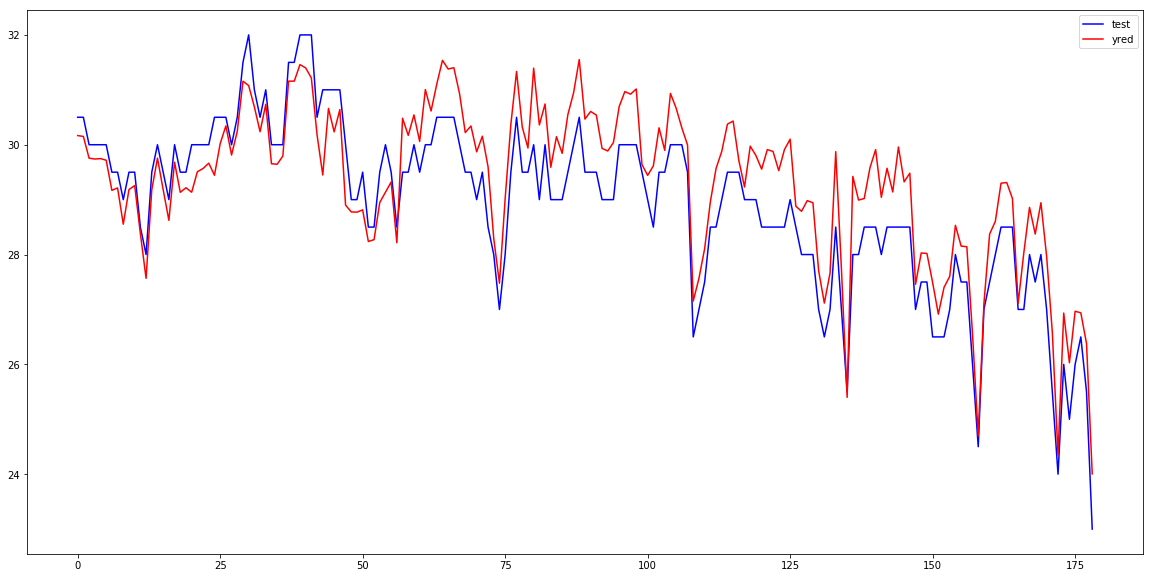

In [24]:
fig = plt.figure(figsize=(20,10)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(range(y_test.shape[0]),y_test,color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(y_test.shape[0]),yuce,color="red", linewidth=1.5, linestyle="-")
plt.legend(['test','yred'])
plt.show() ##显示图片

In [25]:
regressor.evaluate(input_fn=my_input_fn(x_test,y_test,num_epochs=1,shuffle=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-16-06:19:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from my_model4\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-16-06:19:26
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.5843391, global_step = 1000, label/mean = 28.918995, loss = 52.298347, prediction/mean = 29.332678
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: my_model4\model.ckpt-1000


{'average_loss': 0.5843391,
 'label/mean': 28.918995,
 'loss': 52.298347,
 'prediction/mean': 29.332678,
 'global_step': 1000}